## Applications of Clustering and PCA using Python libraries and public datasets

Contents:
- Introduction to K-means
- Application of K-means to Mall Customers dataset

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Data 1

In [2]:
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week7\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
cols = df.columns
df.columns = [col.lower() for col in cols]

df.rename(columns={'annual income (k$)' : 'ann_income', 
                    'spending score (1-100)' : 'sp_score'},
                   inplace=True)

df.head()

,customerid,gender,age,ann_income,sp_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


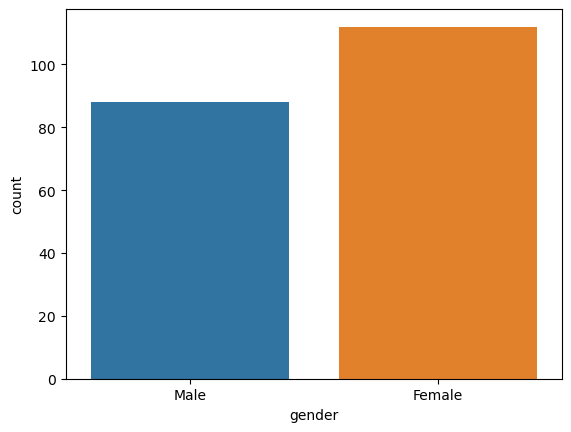

In [4]:
sns.countplot(x='gender', data=df, hue='gender') # Count Plot of Gender
plt.show()

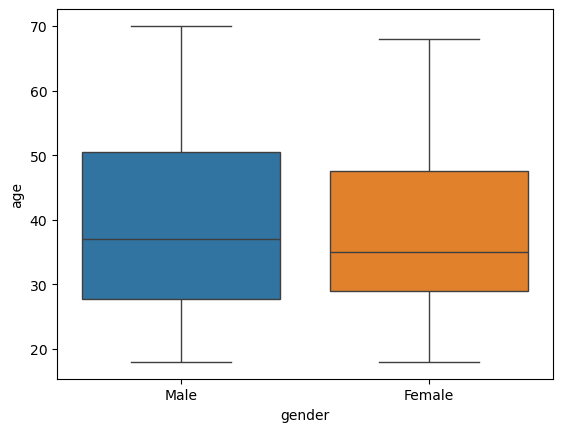

In [5]:
sns.boxplot(x='gender', y='age',data=df, hue='gender')
plt.show()

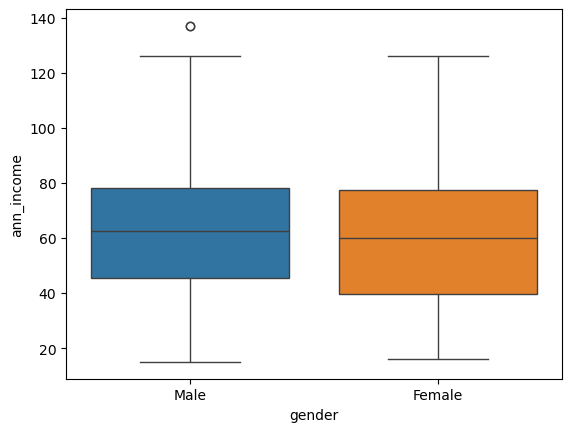

In [6]:
sns.boxplot(x='gender', y='ann_income', data=df, hue='gender')
plt.show()

In [7]:
#Let's check the data before clustering. For this purpose, I will use x1=Age and x2=Spending Score (1-100)

In [8]:
X = df.iloc[:, [3, 4]].values

In [9]:
# X

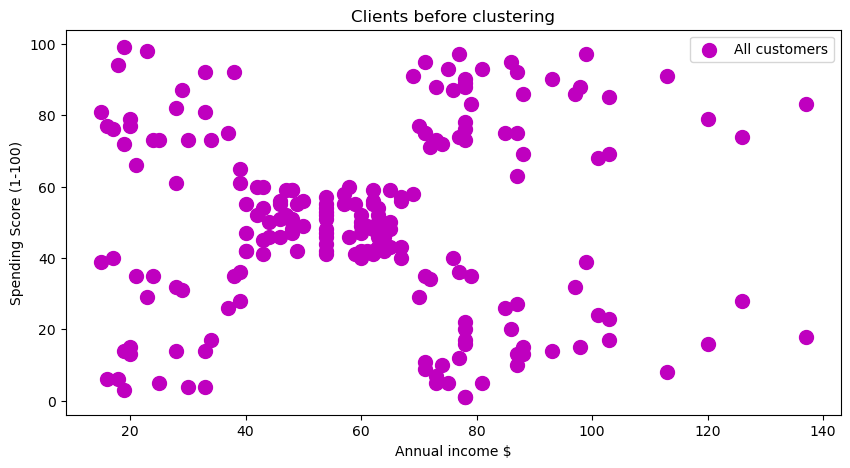

In [10]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Annual income $')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K-Means Clustering

## Elbow_methode

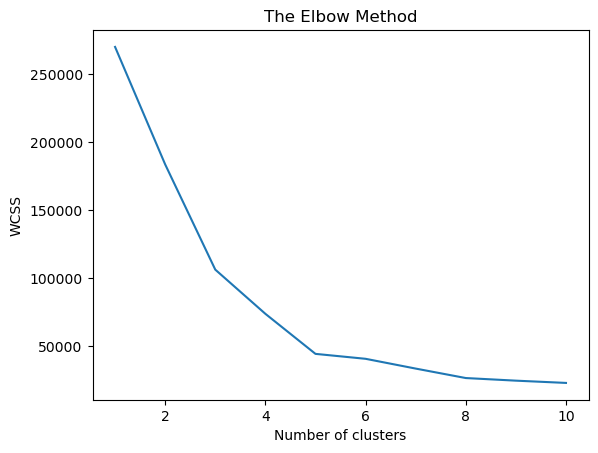

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

In [11]:
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
wcss # mesafeler

## Silhouete_methode

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.39564531743995546
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4937945814354117
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5128405328004378
For n_clusters = 7 The average silhouette_score is : 0.5017174409749505
For n_clusters = 8 The average silhouette_score is : 0.4962769338093321


## K-Means Model build

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

### whic the find best clusters 

#### 1 method

In [15]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [16]:
pd.DataFrame(kmeans.cluster_centers_, columns=['an_incmoe', 'sp_score'])

,an_incmoe,sp_score
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [17]:
df_cluster = pd.DataFrame(kmeans.cluster_centers_, columns=['an_incmoe', 'sp_score'])
df_cluster.index.name = 'Cluster'
df_cluster

,an_incmoe,sp_score
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


##### 2 method

In [18]:
df_cluster = pd.DataFrame(X, columns=['ann_income', 'sp_score'])
df_cluster["Cluster"] = y_kmeans
df_cluster

,ann_income,sp_score,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [19]:
df_cluster.groupby("Cluster").mean()

,ann_income,sp_score
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


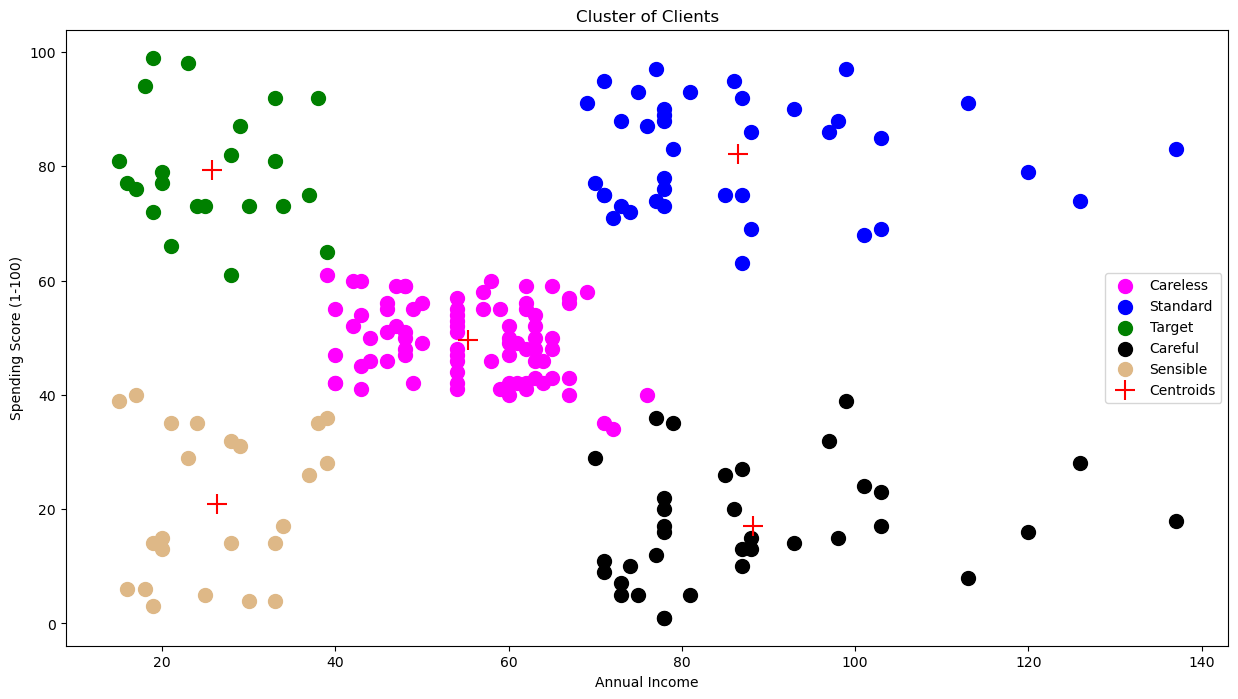

In [20]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='Careful')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical clustering

<b>Hierarchical clustering </b> (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

- <b>Agglomerative </b>: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
- <b>Divisive </b>: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

## Agglomerative Clustering

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters, this comes with a price: performance $O(n^3)$. In sklearn’s implementation, we can specify the number of clusters to assist the algorithm’s performance.

### Algorithm
- Compute the proximity matrix
- Let each data point be a cluster
- Repeat: Merge two closest clusters and update the proximity matrix until 1/ K cluster remains

Ex. - We have six data points {A,B,C,D,E,F}.

- In the initial step, we consider all the six data points as individual clusters as shown in the image below.



- The first step is to determine which elements to merge in a cluster. Usually, we want to take the two closest elements, according to the chosen distance.We construct a distance matrix at this stage, where the number in the i-th row j-th column is the distance between the i-th and j-th elements. Then, as clustering progresses, rows and columns are merged as the clusters are merged and the distances updated.

#### Computation of proximity/distance matrix

The choice of an appropriate metric will influence the shape of the clusters, as some elements may be close to one another according to one distance and farther away according to another. For example, in a 2-dimensional space, the distance between the point (1,0) and the origin (0,0) is always 1 according to the usual norms, but the distance between the point (1,1) and the origin (0,0) can be 2 under Manhattan distance, $\sqrt2$ under Euclidean distance, or 1 under maximum distance.

Some commonly used metrics for hierarchical clustering are:



For text or other non-numeric data, metrics such as the Hamming distance or Levenshtein distance are often used.

- Similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F. To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one of the following:
     - The maximum distance between elements of each cluster (also called  <b> complete-linkage clustering </b>)
     - The minimum distance between elements of each cluster (also called <b> single-linkage clustering </b>)
     - The mean distance between elements of each cluster (also called <b> average linkage clustering </b>)
     - The sum of all intra-cluster variance.
- Again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
- Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
- Finally, all the clusters are merged together and form a single cluster.



The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits.



### Example

## Hierarchical

### Importing the dataset

In [21]:
# df=pd.read_csv('Mall_Customers.csv')
# df.head()

### Creating the matrix of Features

In [22]:
# X=df.iloc[:,[3,4]].values

### Dendogram to find optimal number of clusters

In [23]:
# X

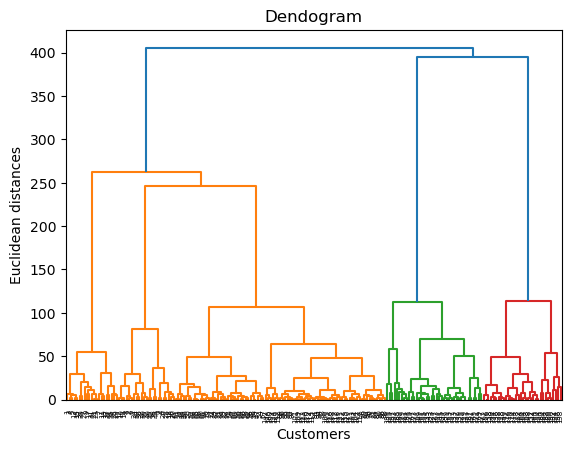

In [24]:
# import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

dendogram=sch.dendrogram(sch.linkage(X,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset.

### Fitting Hierarchical clustering to data

## AgglomerativeClustering Model bulid

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)

In [26]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### whic the find best clusters

In [27]:
df_cluster_hc_1 = pd.DataFrame(X, columns=['ann_income', 'spend_score'])
df_cluster_hc_1

,ann_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [28]:
df_cluster_hc_2 = pd.DataFrame(y_hc, columns=['Cluster'])
df_cluster_hc_2

,Cluster
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [29]:
df_cluster_hc = pd.concat(objs=[df_cluster_hc_1, df_cluster_hc_2], axis=1)
df_cluster_hc

,ann_income,spend_score,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


In [30]:
df_cluster_hc.groupby('Cluster').mean()

,ann_income,spend_score
Cluster,,
0,89.406250,15.593750
1,55.811765,49.129412
2,86.538462,82.128205
3,25.095238,80.047619
4,26.304348,20.913043


### Visualizing the cluster

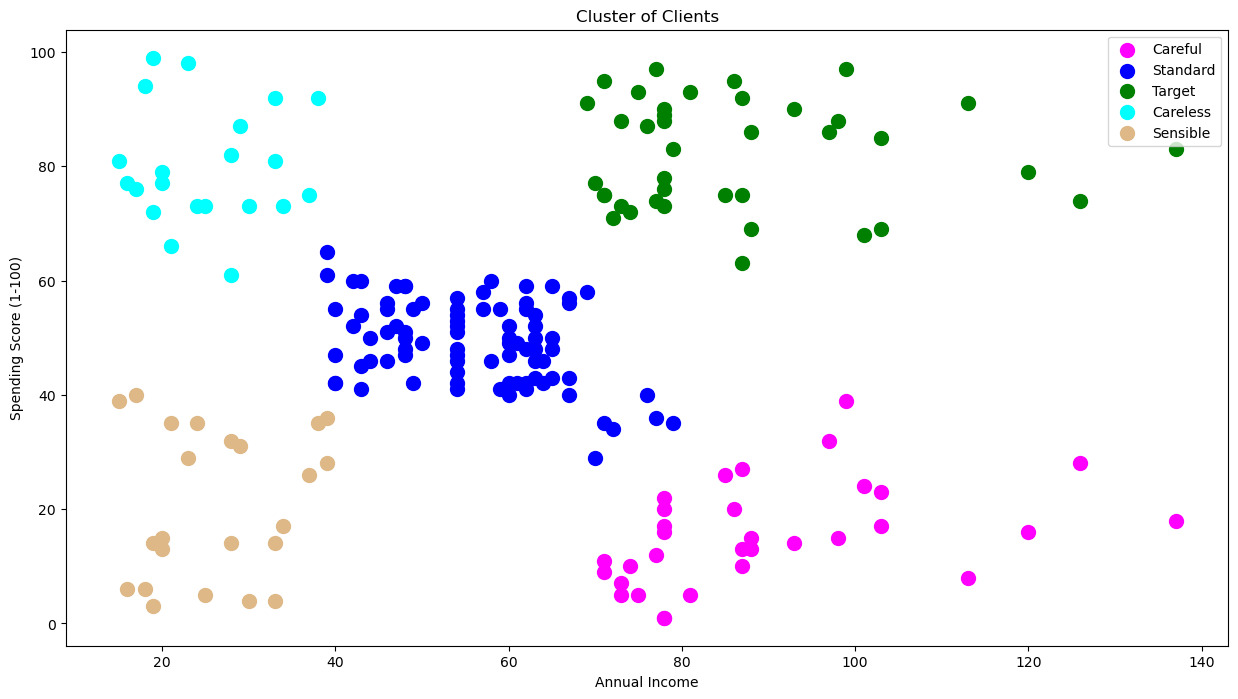

In [31]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='magenta',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='burlywood',label='Sensible')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.ioff()
plt.show()

Based on the above clusters we can do targetted marketing and increase our sales

## Data 2

In [32]:
df2 = pd.read_csv(r'C:\Users\dell\Desktop\Python\week7\musteriler.csv')
df2

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [33]:
cols = df2.columns
df2.columns = [col.lower() for col in cols]

df2.rename(columns={'cinsiyet' : 'gender', 
                    'yas' : 'age',
                    'hacim':'weight',
                    'maas':'income'
                   },
                   inplace=True)

df2.head()

,no,gender,age,weight,income
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [34]:
X_ = df2.iloc[:,3:]
print("weight",X_.iloc[:,0])#weight
print("income",X_.iloc[:,1])#income

weight 0      69900
1      79000
2      85500
3      17100
4       5500
       ...  
195    96600
196    83700
197    34000
198    42000
199    47600
Name: weight, Length: 200, dtype: int64
income 0      6325
1      5200
2      7825
3      8375
4      5450
       ... 
195    7900
196    7675
197    4000
198    5500
199    4150
Name: income, Length: 200, dtype: int64


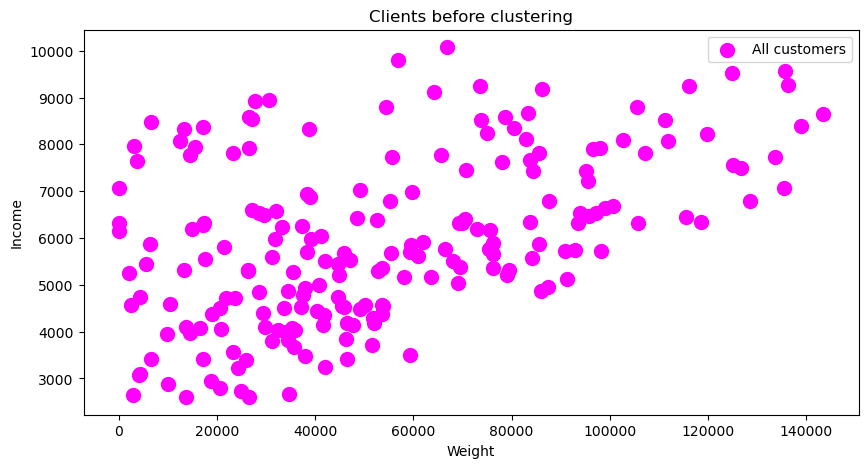

In [35]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X_.iloc[:,0], X_.iloc[:,1], s=100, c='magenta', label='All customers')
plt.title('Clients before clustering')
plt.xlabel('Weight')
plt.ylabel('Income')
plt.legend()
plt.show()

## K-Means Clustering

### Elbow_methode

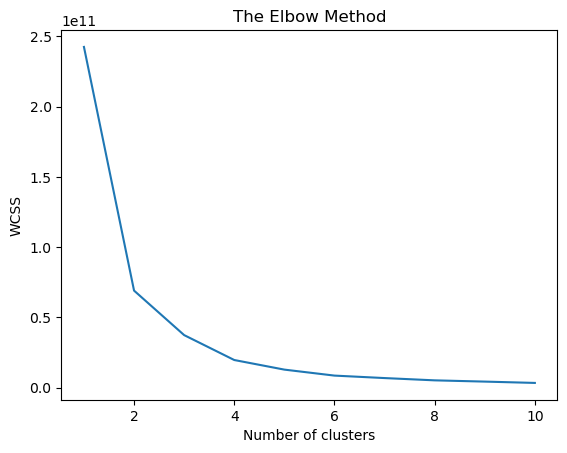

In [36]:
from sklearn.cluster import KMeans

wcss_2 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X_)
    wcss_2.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouete_methode

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3774913479961559
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4937945814354117
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5379675585622219
For n_clusters = 7 The average silhouette_score is : 0.45307746090205386
For n_clusters = 8 The average silhouette_score is : 0.4545701047772879
For n_clusters = 9 The average silhouette_score is : 0.4344557560561418


## K-Means Model build

In [38]:
kmeans = KMeans( n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans2= kmeans.fit_predict(X_)

In [39]:
y_kmeans2

array([2, 2, 4, 0, 0, 0, 0, 2, 0, 3, 2, 4, 3, 3, 4, 1, 4, 0, 2, 2, 0, 0,
       4, 3, 1, 3, 0, 2, 0, 3, 0, 3, 3, 4, 3, 3, 3, 0, 3, 1, 4, 0, 4, 0,
       0, 3, 3, 2, 3, 1, 0, 2, 4, 1, 2, 4, 0, 4, 3, 2, 1, 4, 3, 0, 3, 0,
       2, 4, 3, 0, 4, 2, 4, 2, 0, 0, 4, 2, 3, 0, 0, 0, 3, 3, 1, 2, 2, 3,
       0, 0, 2, 0, 1, 3, 0, 2, 3, 4, 0, 0, 3, 1, 2, 0, 0, 2, 4, 3, 2, 1,
       1, 4, 2, 2, 4, 3, 0, 4, 3, 2, 0, 3, 4, 2, 2, 3, 0, 0, 1, 0, 0, 3,
       3, 2, 3, 0, 3, 3, 4, 3, 4, 0, 3, 2, 2, 3, 3, 3, 3, 0, 3, 3, 2, 0,
       3, 1, 0, 3, 4, 0, 3, 3, 3, 3, 0, 3, 3, 4, 0, 0, 4, 3, 0, 3, 2, 0,
       0, 3, 1, 3, 3, 2, 2, 1, 4, 1, 0, 0, 3, 0, 3, 0, 3, 2, 0, 4, 4, 3,
       3, 3])

### whic the find best clusters

In [40]:
kmeans.cluster_centers_

array([[ 15532.14285714,   5382.58928571],
       [126350.        ,   8059.375     ],
       [ 68985.71428571,   6650.71428571],
       [ 41873.01587302,   5101.19047619],
       [ 92673.33333333,   6878.33333333]])

In [41]:
df_cluster_2 = pd.DataFrame(data=kmeans.cluster_centers_, columns=X_.columns)
df_cluster_2.index.name = 'Cluster'
df_cluster_2

,weight,income
Cluster,,
0,15532.142857,5382.589286
1,126350.000000,8059.375000
2,68985.714286,6650.714286
3,41873.015873,5101.190476
4,92673.333333,6878.333333


In [42]:
df_cluster_2.sort_values(by=['weight', 'income'], ascending=False)

,weight,income
Cluster,,
1,126350.000000,8059.375000
4,92673.333333,6878.333333
2,68985.714286,6650.714286
3,41873.015873,5101.190476
0,15532.142857,5382.589286


### Visualizing

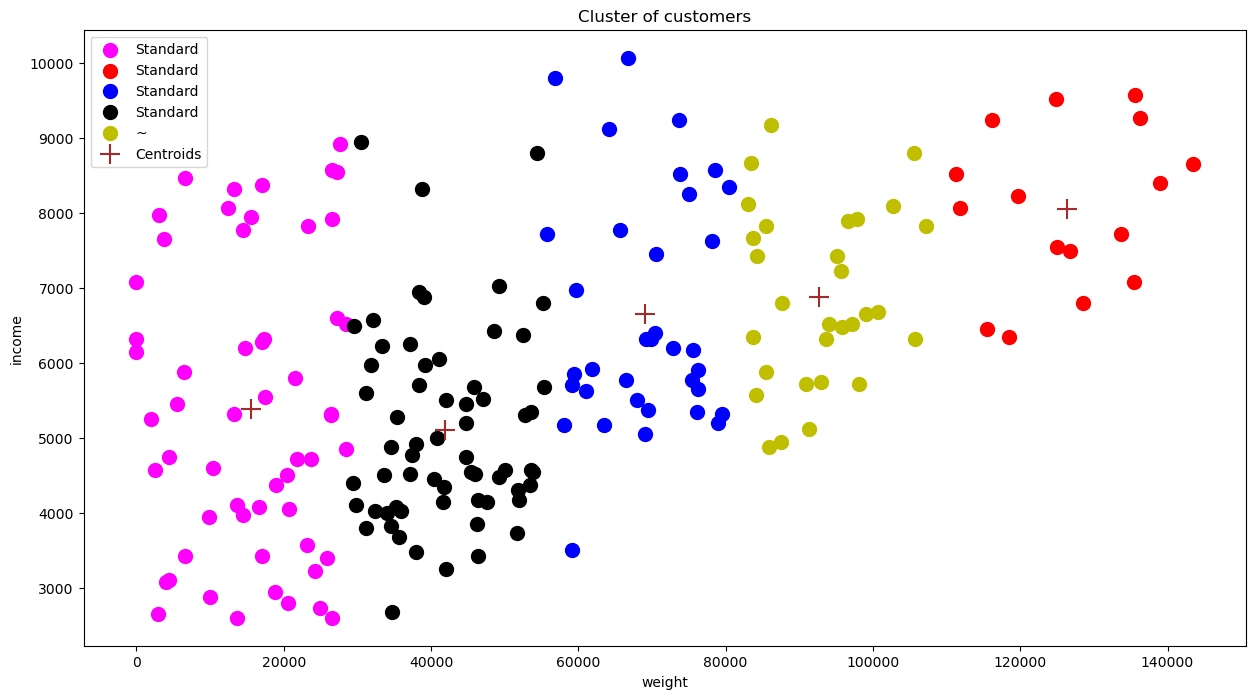

In [43]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X_.iloc[y_kmeans2==0,0],X_.iloc[y_kmeans2==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X_.iloc[y_kmeans2==1,0],X_.iloc[y_kmeans2==1,1],s=100,c='red',label='Standard')
plt.scatter(X_.iloc[y_kmeans2==2,0],X_.iloc[y_kmeans2==2,1],s=100,c='blue',label='Standard')
plt.scatter(X_.iloc[y_kmeans2==3,0],X_.iloc[y_kmeans2==3,1],s=100,c='black',label='Standard')
plt.scatter(X_.iloc[y_kmeans2==4,0],X_.iloc[y_kmeans2==4,1],s=100,c='y',label='~')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                                                    s=200, color = "brown", label='Centroids', marker = "+")

plt.title('Cluster of customers')
plt.xlabel('weight')
plt.ylabel('income')
plt.legend()


plt.show()


## Hierarchical Clustering

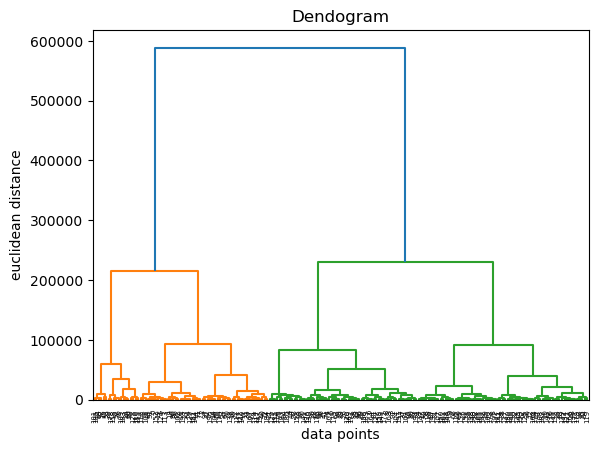

In [44]:
# %% dendogram
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(X_,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.title('Dendogram')
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

## AgglomerativeClustering Model Build

In [45]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_ac = ac.fit_predict(X_)

In [46]:
y_ac

array([0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 3, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 3, 2, 0, 3, 3, 0, 0, 2, 0, 1, 0, 3, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 3, 0, 1, 2, 2, 2, 1, 1, 3, 0, 0, 1,
       2, 2, 0, 2, 3, 1, 2, 1, 2, 0, 2, 2, 1, 3, 0, 2, 2, 0, 0, 1, 1, 3,
       3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 3, 1, 1, 0, 1, 3, 0, 3, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1,
       1, 1], dtype=int64)

### whic the best clusters

In [47]:
df_cluster_ac = pd.DataFrame(data=X_, columns=X_.columns)
df_cluster_ac['Cluster'] = y_ac
df_cluster_ac

,weight,income,Cluster
0,69900,6325,0
1,79000,5200,0
2,85500,7825,0
3,17100,8375,2
4,5500,5450,2
...,...,...,...
195,96600,7900,0
196,83700,7675,0
197,34000,4000,1
198,42000,5500,1


In [48]:
df_cluster_ac.groupby('Cluster').mean()

,weight,income
Cluster,,
0,82342.307692,6821.634615
1,45118.840580,5201.086957
2,16483.333333,5422.916667
3,123163.157895,7994.736842


In [49]:
df_cluster_ac.groupby('Cluster').mean().sort_values(by=['weight', 'income'], ascending=False)

,weight,income
Cluster,,
3,123163.157895,7994.736842
0,82342.307692,6821.634615
1,45118.840580,5201.086957
2,16483.333333,5422.916667


### Visualizing

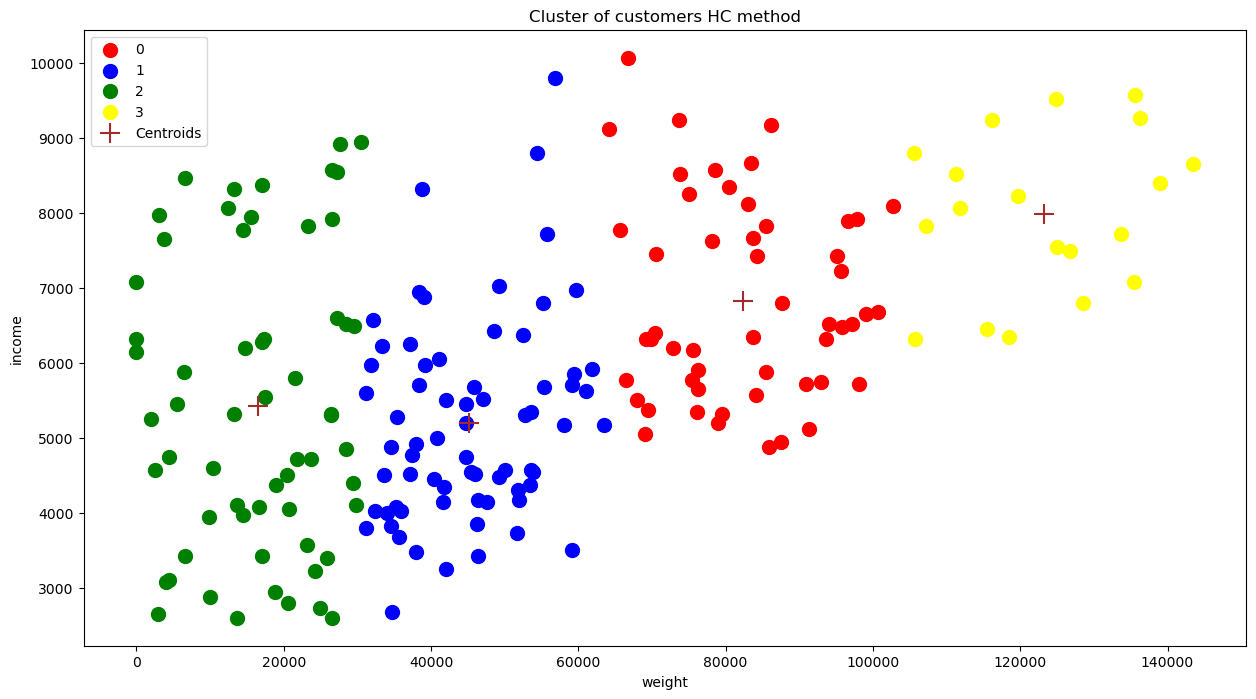

In [50]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X_.iloc[y_ac==0,0],X_.iloc[y_ac==0,1],s=100, c='red', label=0)
plt.scatter(X_.iloc[y_ac==1,0],X_.iloc[y_ac==1,1],s=100, c='blue', label=1)
plt.scatter(X_.iloc[y_ac==2,0],X_.iloc[y_ac==2,1],s=100, c='green', label=2)
plt.scatter(X_.iloc[y_ac==3,0],X_.iloc[y_ac==3,1],s=100, c='yellow', label=3)

plt.scatter(df_cluster_ac.groupby('Cluster').mean().iloc[:, 0], df_cluster_ac.groupby('Cluster').mean().iloc[:, 1],\
           s=200, color = "brown", label='Centroids', marker = "+")

plt.title('Cluster of customers HC method')
plt.xlabel('weight')
plt.ylabel('income')
plt.legend()

plt.show()

## Data 3

### Biomechanical features of orthopedic patients

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

- pelvic incidence
- pelvic tilt
- lumbar lordosis angle
- sacral slope
- pelvic radius
- grade of spondylolisthesis

In [51]:
df3 = pd.read_csv(r'C:\Users\dell\Desktop\Python\week7\column_2C_weka.csv')
df3

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [52]:
df3["class"].nunique()

2

In [53]:
df3["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [54]:
df3["class"].value_counts()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


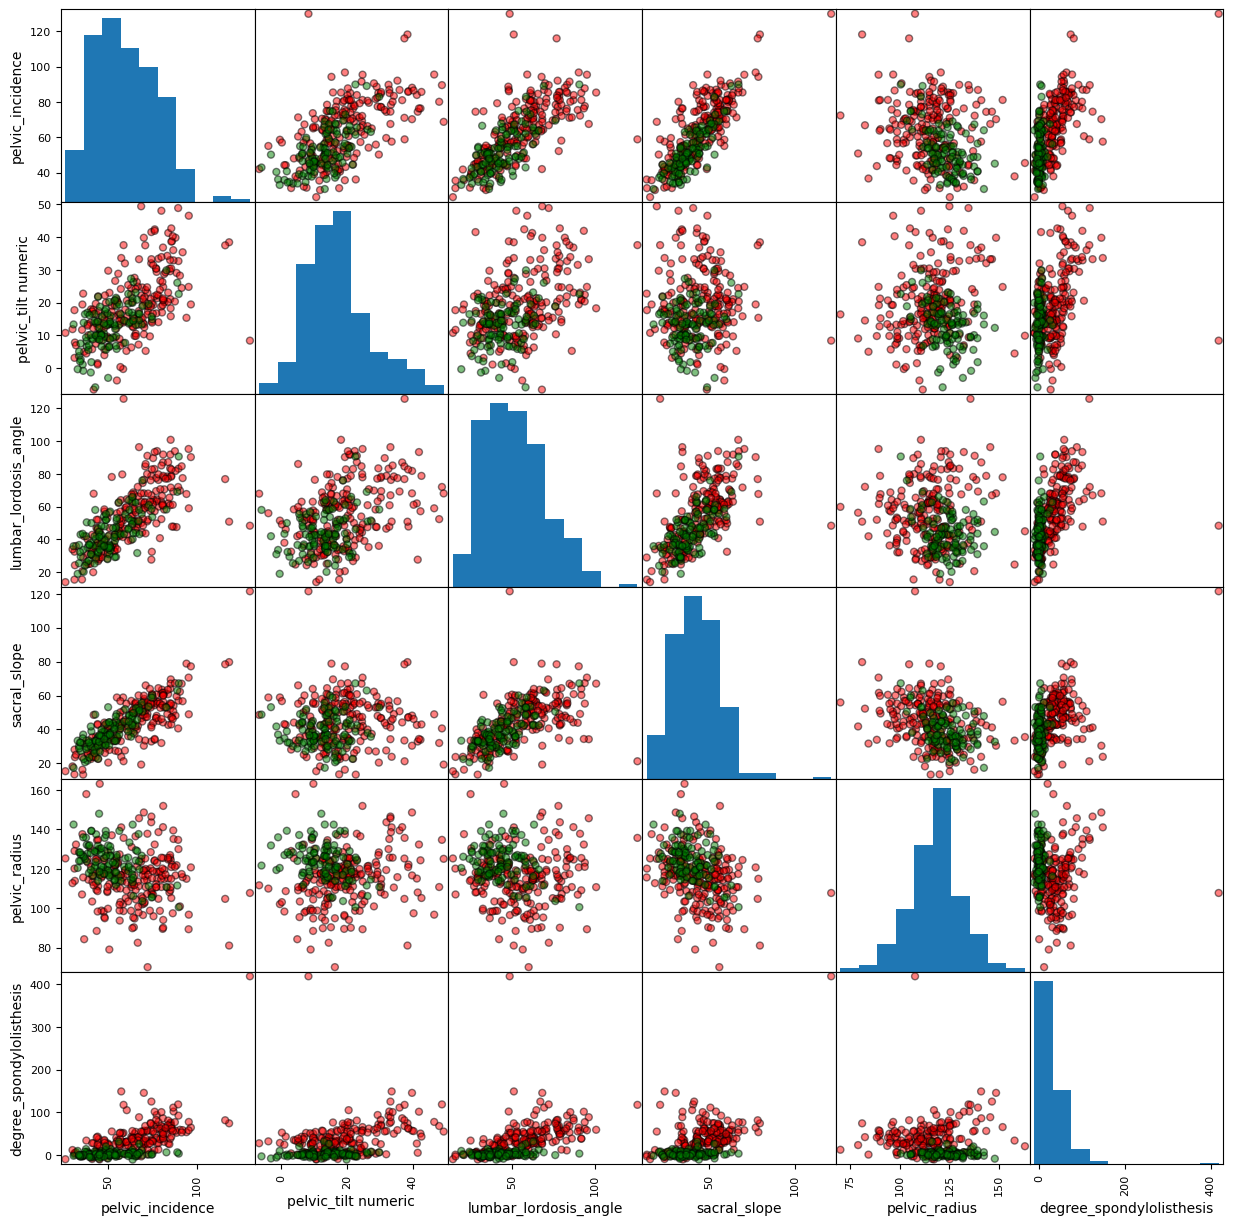

In [56]:
def color_generate():
    colors=[]
    for i in df3.loc[:,'class']:
        if i=='Abnormal':
            colors.append('red')
        else:
            colors.append('green')
    return colors
        
pd.plotting.scatter_matrix(df3.loc[:, df3.columns != 'class'],
                                       c=color_generate(),
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 100,
                                       edgecolor= "black")
plt.show()

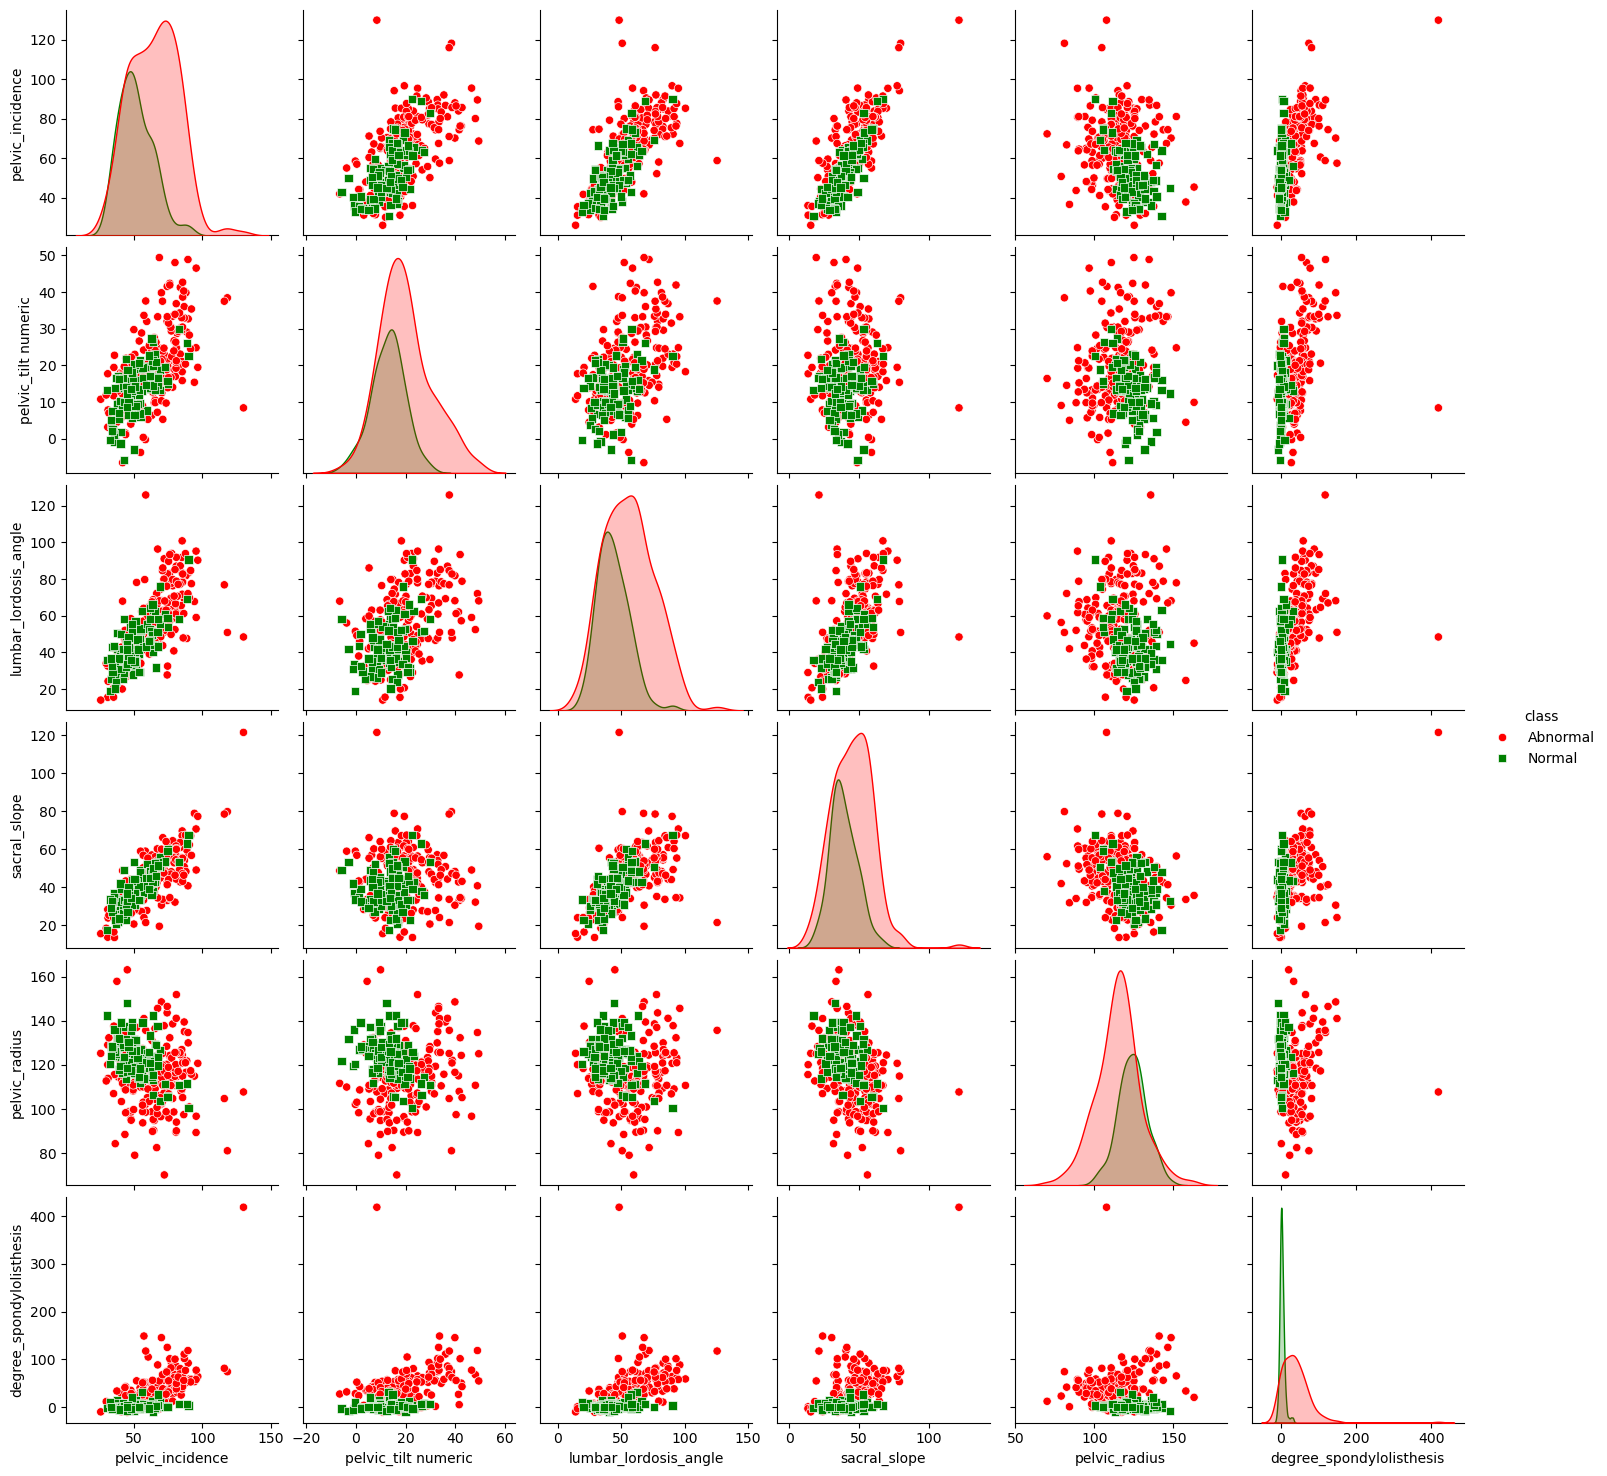

In [57]:
sns.pairplot(df3, hue="class", markers=["o", "s"], palette={"Abnormal":"red","Normal":"green"})
plt.show()

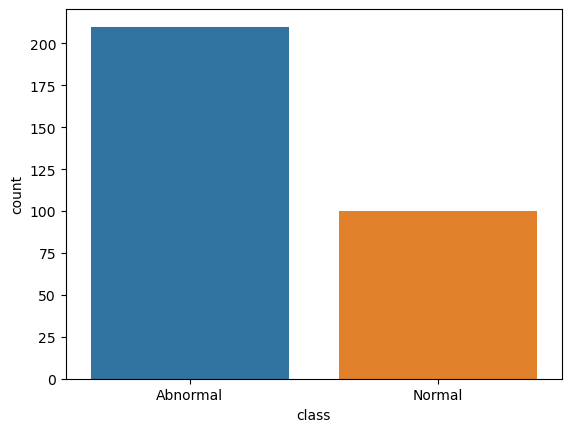

class
Abnormal    210
Normal      100
Name: count, dtype: int64

In [58]:
sns.countplot(x="class", data=df3, hue='class')
plt.show()
df3.loc[:,'class'].value_counts()

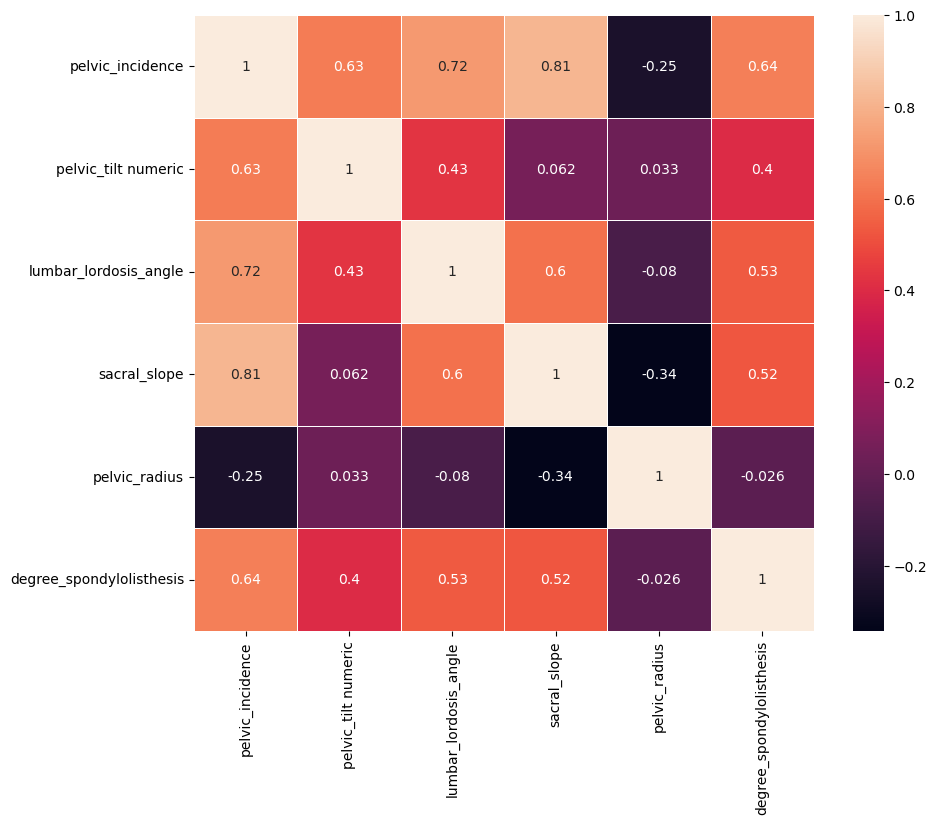

In [59]:
corr=df3.corr(numeric_only=True)
fig, ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(corr,annot=True, linewidth=.5, ax=ax)
plt.show()

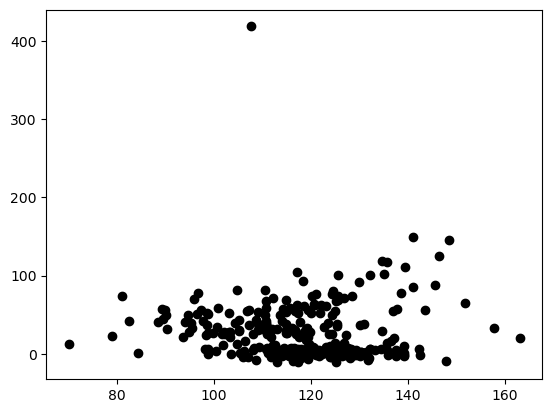

In [60]:
x1 = df3["pelvic_radius"]
x2 = df3["degree_spondylolisthesis"]
plt.scatter(x1 ,x2 ,color = "black")
plt.show()

In [61]:
#We ignore this
mean=df3.degree_spondylolisthesis.mean()
a = df3.degree_spondylolisthesis.max()
df3[df3.degree_spondylolisthesis == a] = mean

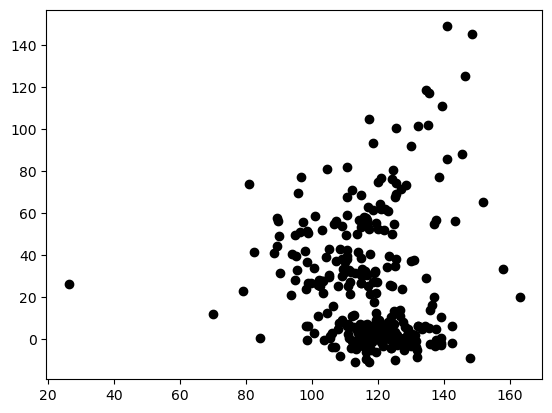

In [62]:
#We use sacral_radius and pelvic incidence for showing our cluster.
plt.scatter(x1 ,x2 ,color = "black")
plt.show()

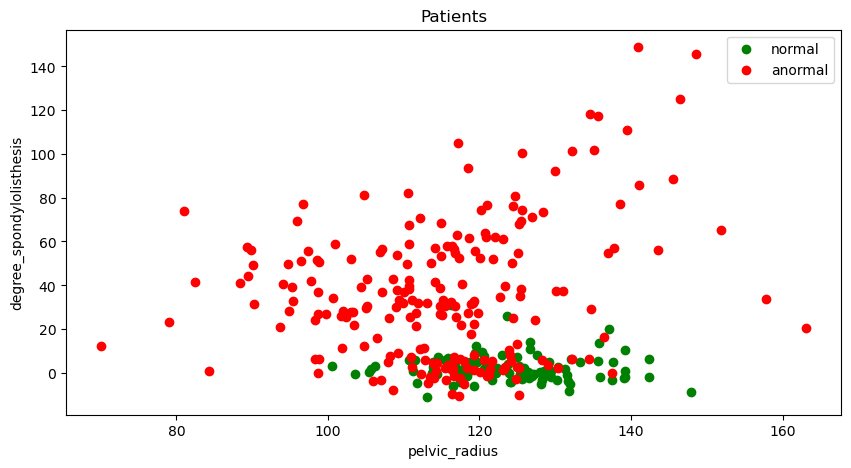

In [63]:
fig = plt.figure(figsize = (10,5))
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.scatter(df3[df3["class"] == "Normal"].pelvic_radius , df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "green",label="normal")
plt.scatter(df3[df3["class"] == "Abnormal"].pelvic_radius , df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "red",label="anormal")
plt.legend()
plt.show()

## Features select

In [64]:
cluster_data=pd.DataFrame({"x1":x1,"x2":x2})
cluster_data

,x1,x2
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501
...,...,...
305,117.449062,-4.245395
306,114.365845,-0.421010
307,125.670725,-2.707880
308,118.545842,0.214750


## K-Means Clustering

### Elbow_methode

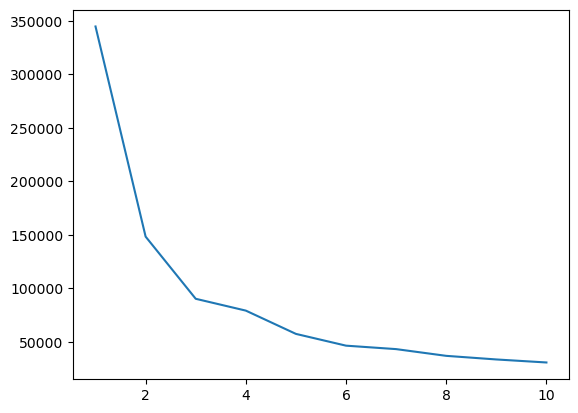

In [65]:
wcss_3 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(cluster_data)
    wcss_3.append(kmeans.inertia_)

plt.plot(range(1,11),wcss_3)
plt.show()

### Silhouete_methode

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5450742831361873
For n_clusters = 3 The average silhouette_score is : 0.5195726484789815
For n_clusters = 4 The average silhouette_score is : 0.5028378551587366
For n_clusters = 5 The average silhouette_score is : 0.3798698356892794
For n_clusters = 6 The average silhouette_score is : 0.360748270555552
For n_clusters = 7 The average silhouette_score is : 0.37403166747445576
For n_clusters = 8 The average silhouette_score is : 0.38627152045426655
For n_clusters = 9 The average silhouette_score is : 0.36080468791466563
For n_clusters = 10 The average silhouette_score is : 0.35413858251013325
For n_clusters = 11 The average silhouette_score is : 0.3543436872276142


## K-Means Model build

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(cluster_data)

In [68]:
df3['cluster']=y_kmeans

### whic the best clusters

In [69]:
kmeans.cluster_centers_

array([[116.00865672,  63.44113068],
       [118.36499636,   8.57006329]])

In [70]:
df3_cluster = pd.DataFrame(data=kmeans.cluster_centers_, columns=cluster_data.columns)
df3_cluster.index.name = 'Cluster'
df3_cluster

,x1,x2
Cluster,,
0,116.008657,63.441131
1,118.364996,8.570063


### Visualizing

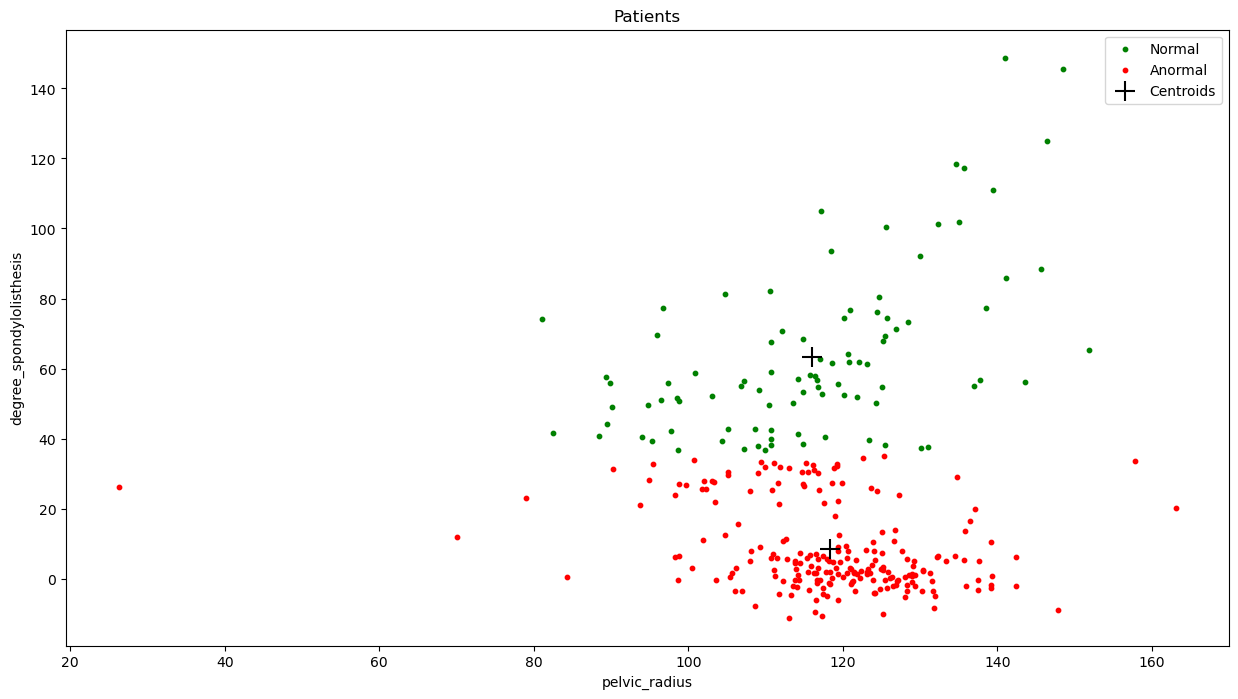

In [71]:
fig = plt.figure(figsize = (15,8))
plt.scatter(cluster_data['x1'][y_kmeans==0],cluster_data['x2'][y_kmeans==0],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_kmeans==1],cluster_data['x2'][y_kmeans==1],s=10,c='red',label='Anormal')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids',marker = "+")
plt.title('Patients')
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.legend()
plt.show()

### Checking Accuracy

In [72]:
data_for_acc=pd.read_csv(r'C:\Users\dell\Desktop\Python\week7\column_2C_weka.csv')
data_for_acc["class"] = [0 if each == "Abnormal" else 1 for each in data_for_acc["class"]]

In [73]:
data_for_acc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


In [74]:
actual_class=data_for_acc["class"]
predicted_class=df3['cluster']

In [75]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.996225806451613


## Hierarcihal Cluster

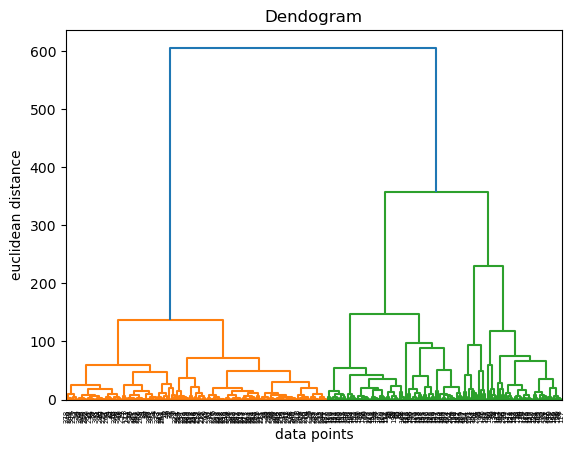

In [76]:
# %% dendogram
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(cluster_data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.title('Dendogram')
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

## AgglomerativeClustering Model bulid

In [77]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2, metric= "euclidean", linkage = "ward")
y_ac = ac.fit_predict(cluster_data)

df3["ac_cluster"] = y_ac

### which the best clusters

In [78]:
df3_cluster_ac = pd.DataFrame(data=cluster_data, columns=cluster_data.columns)
df3_cluster_ac['Cluster'] = y_ac
df3_cluster_ac

,x1,x2,Cluster
0,98.672917,-0.254400,1
1,114.405425,4.564259,1
2,105.985135,-3.530317,1
3,101.868495,11.211523,1
4,108.168725,7.918501,1
...,...,...,...
305,117.449062,-4.245395,1
306,114.365845,-0.421010,1
307,125.670725,-2.707880,1
308,118.545842,0.214750,1


In [79]:
df3_cluster_ac.groupby('Cluster').mean()

,x1,x2
Cluster,,
0,113.880210,50.354903
1,121.065144,2.193609


## Visualizing

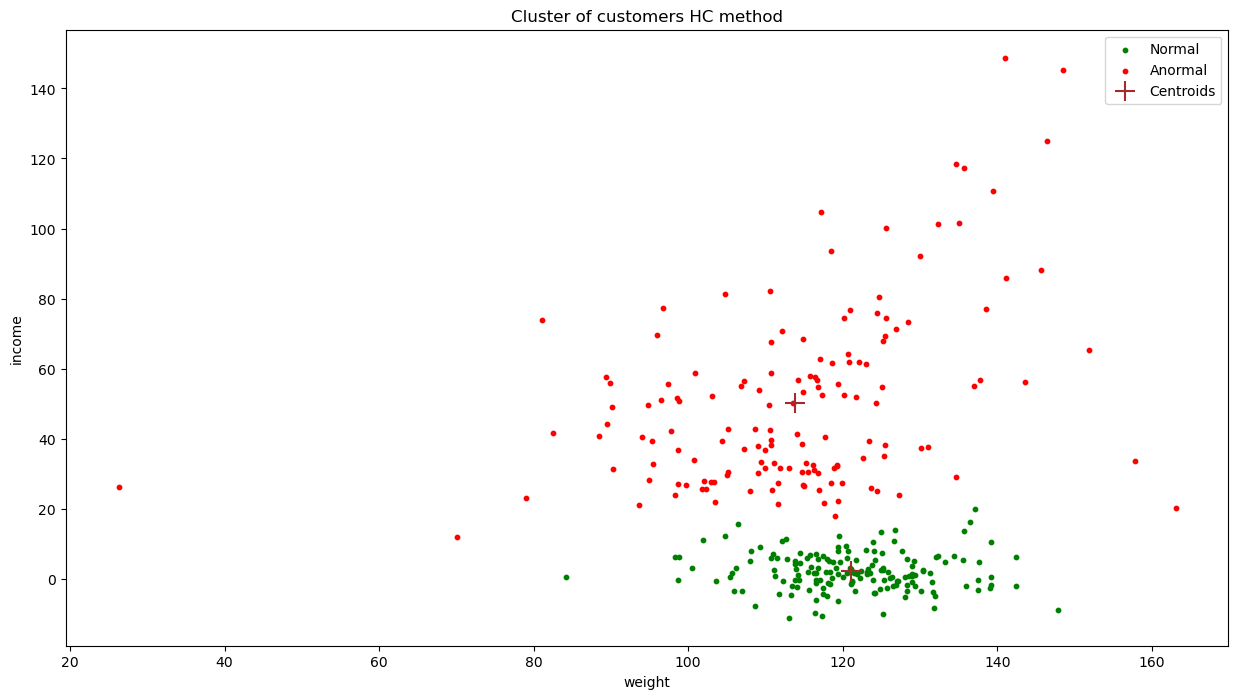

In [80]:
fig = plt.figure(figsize = (15,8))
plt.scatter(cluster_data['x1'][y_ac==1],cluster_data['x2'][y_ac==1],s=10,c='green',label='Normal')
plt.scatter(cluster_data['x1'][y_ac==0],cluster_data['x2'][y_ac==0],s=10,c='red',label='Anormal')

plt.scatter(df3_cluster_ac.groupby('Cluster').mean().iloc[:, 0], df3_cluster_ac.groupby('Cluster').mean().iloc[:, 1],\
           s=200, color = "brown", label='Centroids', marker = "+")

plt.title('Cluster of customers HC method')
plt.xlabel('weight')
plt.ylabel('income')
plt.legend()

plt.show()

## Checking Accuracy

In [81]:
data_for_acc["class"] = [1 if each == "Abnormal" else 0 for each in data_for_acc["class"]]

In [82]:
data_for_acc

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [83]:
actual_class=data_for_acc["class"]
predicted_class=df3['ac_cluster']

In [84]:
print("accuracy is : {}".format((100 - np.mean(np.abs(actual_class - predicted_class)))/100))

accuracy is : 0.9947419354838709


In [88]:
df3["ac_cluster"] = [0 if each == 1 else 1 for each in df3["ac_cluster"]]

In [89]:
df3

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,cluster,ac_cluster
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1,0
...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,1,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,1,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,1,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,1,0


## Comparing Cluster's Method

### We compare two accuracy with plotly plot

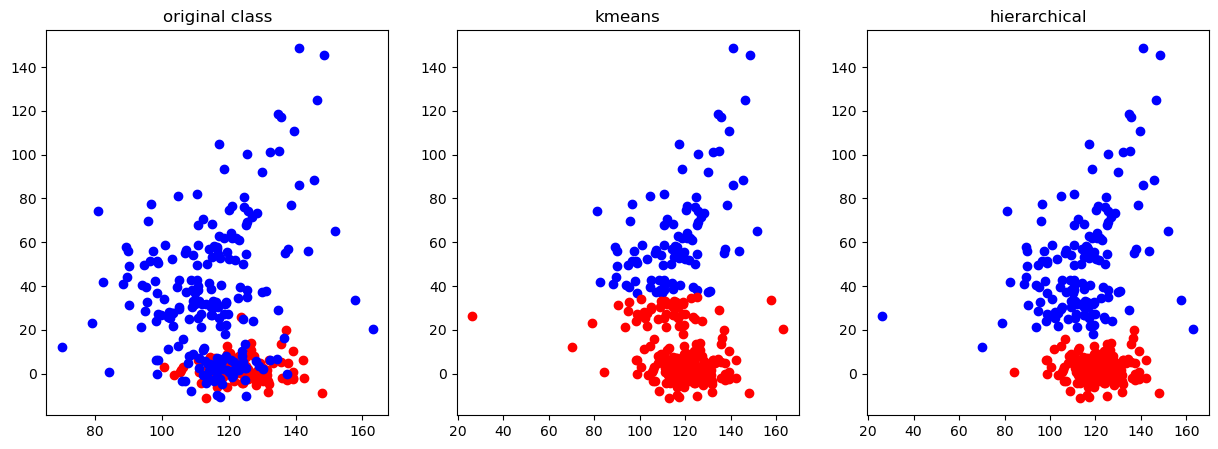

In [91]:
#We compare our model in graph
fig = plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
plt.scatter(x = df3[df3["class"] == "Normal"].pelvic_radius , y = df3[df3["class"] == "Normal"].degree_spondylolisthesis,color = "r")
plt.scatter(x = df3[df3["class"] == "Abnormal"].pelvic_radius , y = df3[df3["class"] == "Abnormal"].degree_spondylolisthesis,color = "b")
plt.title("original class")

plt.subplot(1, 3, 2)
plt.scatter(x = df3[df3.cluster == 0].pelvic_radius,y = df3[df3.cluster == 0].degree_spondylolisthesis , color = "b")
plt.scatter(x = df3[df3.cluster == 1].pelvic_radius,y = df3[df3.cluster == 1].degree_spondylolisthesis , color = "r")
plt.title("kmeans") 

plt.subplot(1, 3, 3)
plt.scatter(x = df3[df3.ac_cluster == 0].pelvic_radius,y = df3[df3.ac_cluster == 0].degree_spondylolisthesis , color = "r")
plt.scatter(x = df3[df3.ac_cluster == 1].pelvic_radius,y = df3[df3.ac_cluster == 1].degree_spondylolisthesis , color = "b")
plt.title("hierarchical")

plt.show()

The accuracy of hierarcihal cluster accuracy is higher than kmeans our data but everytime isn't so

In [92]:
#https://towardsdatascience.com/introduction-to-hierarchical-clustering-part-1-theory-linkage-and-affinity-e3b6a4817702

## PCA

In [93]:
#https://setosa.io/ev/principal-component-analysis/

Main goal of PCA is identify correlation in data, reduce dimension d to k (k<d) while retaining relevant information.
Find $k$ directions, vectors $u^1$,$u^2$...$u^k$ onto which projection error is the minimum.

Steps in PCA:
- Mean normalization and feature scaling
- Creating covariance matrix and calcuate svd (singular value decomposition)
- Calculating eigenvalues and eigenvectors
- Sort eigenvalues
- Select 'k' eigenvectors
- Constructs projection matrix 'w' from 'k' eigenvectors
- Transform original dataset 'X' via 'w' to obtain 'k' dimensional space 'Y'

In [94]:
dataset = pd.read_csv(r'C:\Users\dell\Desktop\Python\week7\Wine.csv')
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [96]:
# Yuxarıdakı datada X-lər çaxırın kimyəvi göstəriciləri, y isə clusteringdən sonrakı market seqmentasiyasını bildirir. 
# Növbəti mərhələ bütün X-lari daxil etməklə Logistic Regression əsasında y-i predict etməkdir

In [97]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [99]:
X.shape, y.shape

((178, 13), (178,))

## Scaling

In [100]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Train Test Split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
#PCA tətbiq olunanda əvvəlcə mütləq feature scaling olmalıdır
#We do this on the training set of data.

#1.Fit(): Method calculates the parameters μ and σ and saves them as internal objects.

#2.Transform(): Method using these calculated parameters apply the transformation to a particular dataset.

#3.Fit_transform(): joins the fit() and transform() method for transformation of dataset.

## Applying PCA

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


## explained_variance

In [106]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.65629405, 0.34370595])

In [125]:
# X_train

In [110]:
# X_test

## LogisticRegression Model Build

In [111]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [112]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [117]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [118]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [119]:
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9722222222222222

##  Visualising the Training set results

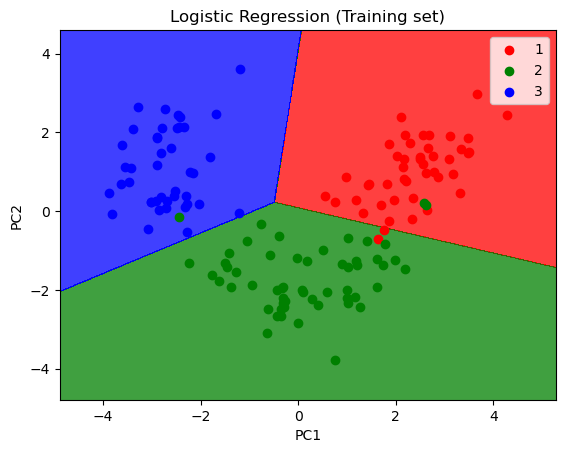

In [123]:
# Visualising the Training set results

X_set, y_set = X_train, y_train
#minimum və maximum dəyərlərin köməyi ilə x1 və x2 (PCA1 və (PCA2) oxlarının aralığı təyin olunur)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

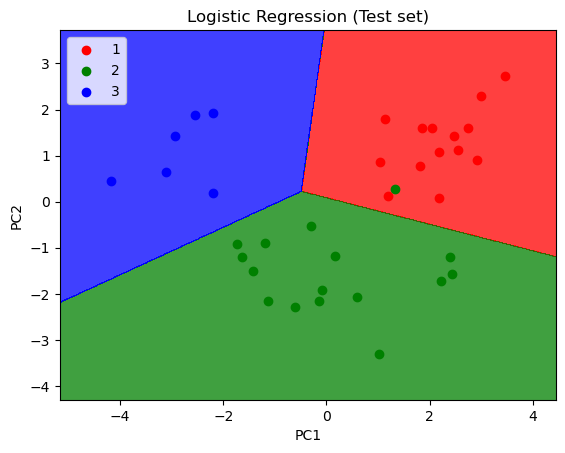

In [126]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()